0                 2000.0 meter
1                 2000.0 meter
2                 1990.2 meter
3     1970.6000000000001 meter
4                 1941.2 meter
5                 1902.0 meter
6                 1853.0 meter
7                 1794.2 meter
8     1725.6000000000001 meter
9                 1647.2 meter
10                1559.0 meter
11                1461.0 meter
12                1353.2 meter
13    1235.6000000000001 meter
14    1108.2000000000003 meter
15     971.0000000000002 meter
Name: y, dtype: object
0                     0.0 meter / second
1                    -9.8 meter / second
2                   -19.6 meter / second
3     -29.400000000000002 meter / second
4                   -39.2 meter / second
5                   -49.0 meter / second
6                   -58.8 meter / second
7                   -68.6 meter / second
8      -78.39999999999999 meter / second
9      -88.19999999999999 meter / second
10     -97.99999999999999 meter / second
11    -107.79999999999998 mete

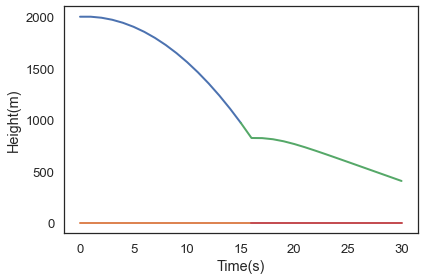

In [46]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
# import functions from the modsim.py module
from modsim import *
m = UNITS.meter
s = UNITS.second
g = 9.8 * m/s**2
init_z = State(y=2000.0 * m, v=0.0 * m/s)
t_fend = 30* s
t_open=15*s
dt = 1* s
system1_z=System(init=init_z,g=g,t_end=t_open,dt=dt)
def slope_func1_z(state, t, system1):
    y,v = state
    dydt = v
    dvdt = -system1.g
    return dydt, dvdt
Vz, Az = slope_func1_z(system1_z.init, 0, system1_z)
results1_z, details1_z = run_euler(system1_z, slope_func1_z)
plot(results1_z.y)
decorate(xlabel='Time(s)',ylabel='Height(m)')
x=[0,2,4,6,8,10,12,14,16]
y=[0,0,0,0,0,0,0,0,0]
plot(x,y)
print(results1_z.y)
print(results1_z.v)
kg= UNITS.kilogram
S = 20.0 * m**2
ρ = 1.225 * kg/m**3
Yp=get_last_value(results1_z.y) 
Vp=get_last_value(results1_z.v)
print(Yp)
print(Vp)
process_z=State(y=Yp,v=Vp)
system2_z= System(init=process_z, t_end=t_fend,t_0=t_open, dt=dt) 
def slope_func2_z(state,t,system2):
    y,v=state
    dydt=v
    Drag=0.5*v*v*S*0.05*ρ  
    dvdt=Drag/(85.0*kg)-g
    return dydt, dvdt
Vz1,Az1=slope_func2_z(system2_z.init, 0, system2_z)
results2_z,details2_z=run_euler(system2_z, slope_func2_z)
plot(results2_z.y)
decorate(xlabel='Time(s)',ylabel='Height(m)')
x=[16,18,20,22,24,26,28,30]
y=[0,0,0,0,0,0,0,0]
plot(x,y)
print(results2_z.y)
print(results2_z.v)